In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib notebook

In [14]:
path = 'C:\\Users\\Davince\\Dropbox (OIST)\\20180919_QCM_gliomaadhesion\\20180927_GPTEs\\data'
df = pd.read_csv(path, delimiter='\t', names=['Date', 'Time', 'Frequency', 'Dissipation', 'Temp'])
#concatenate and convert date and time from openQCM data into DateTime format in python and calculate elapsed time
df["Date"]=pd.to_datetime(df["Date"])
df["Time"] = pd.to_timedelta(df["Time"])
df["DateTime"]=df["Date"]+df["Time"]
#calculate experimental elapsed time in datetime format
df['elapsed']=df["DateTime"]-df["DateTime"][0]
#calculate experimental elapsed time by seconds
df['elapsedsec']=df['elapsed'].dt.total_seconds()
#calculate delta frequency
df["deltaF"] = df["Frequency"]-df["Frequency"][0]
#sample 1/10th of the data
df["deltaFsampled"] = df["deltaF"].sample(frac = .1)
# rolling mean of sample
df["deltaFrolling"]=df["deltaF"].rolling(window=250).mean()
#calculate delta dissipation
df["deltaD"] = df["Dissipation"]-df["Dissipation"][0]
df["deltaDrolling"] = df["deltaD"].rolling(window=250).mean()
display(df)
#df.dtypes
#save into a new csv
#df.to_csv("processed.csv", header = True, sep=',')

,Date,Time,Frequency,Dissipation,Temp,DateTime,elapsed,elapsedsec,deltaF,deltaFsampled,deltaFrolling,deltaD,deltaDrolling
0,2018-09-27,15:50:55,10006264.5,0.000598,37.5,2018-09-27 15:50:55,0 days 00:00:00,0.0,0.0,0.0,NaN,0.000000,NaN
1,2018-09-27,15:50:57,10006208.7,0.000724,37.5,2018-09-27 15:50:57,0 days 00:00:02,2.0,-55.8,NaN,NaN,0.000126,NaN
2,2018-09-27,15:51:00,10006351.2,0.000785,37.5,2018-09-27 15:51:00,0 days 00:00:05,5.0,86.7,NaN,NaN,0.000187,NaN
3,2018-09-27,15:51:02,10006355.4,0.000786,37.5,2018-09-27 15:51:02,0 days 00:00:07,7.0,90.9,NaN,NaN,0.000188,NaN
4,2018-09-27,15:51:05,10006353.3,0.000788,37.5,2018-09-27 15:51:05,0 days 00:00:10,10.0,88.8,NaN,NaN,0.000190,NaN
5,2018-09-27,15:51:09,10006355.4,0.000786,37.5,2018-09-27 15:51:09,0 days 00:00:14,14.0,90.9,NaN,NaN,0.000189,NaN
6,2018-09-27,15:51:12,10006353.3,0.000786,37.6,2018-09-27 15:51:12,0 days 00:00:17,17.0,88.8,NaN,NaN,0.000189,NaN
7,2018-09-27,15:51:15,10006351.4,0.000784,37.5,2018-09-27 15:51:15,0 days 00:00:20,20.0,86.9,86.9,NaN,0.000187,NaN
8,2018-09-27,15:51:18,10006358.4,0.000786,37.6,2018-09-27 15:51:18,0 days 00:00:23,23.0,93.9,NaN,NaN,0.000189,NaN
9,2018-09-27,15:51:21,10006360.7,0.000780,37.6,2018-09-27 15:51:21,0 days 00:00:26,26.0,96.2,96.2,NaN,0.000183,NaN


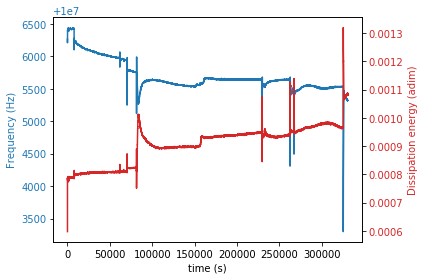

In [16]:
#plot dual y axis plot like original data in openQCM software
fig, ax1 = plt.subplots()
color='tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Frequency (Hz)', color=color)
ax1.plot(df['elapsedsec'], df['Frequency'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'

ax2.set_ylabel('Dissipation energy (adim)', color=color)
ax2.plot(df['elapsedsec'], df['Dissipation'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig('plot1.png', dpi=1200)
plt.show()

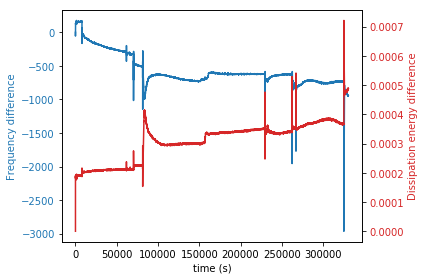

In [17]:
#plot dual y axis plot in difference in openQCM software
fig, ax1 = plt.subplots()

color='tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Frequency difference', color=color)
ax1.plot(df['elapsedsec'], df['deltaF'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Dissipation energy difference', color=color)
ax2.plot(df['elapsedsec'], df['deltaD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig('plot2.png', dpi=1200)
plt.show()


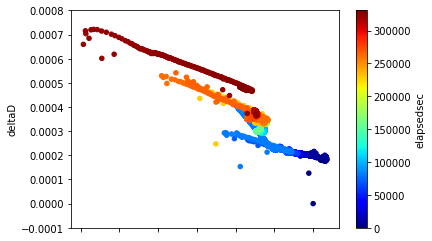

In [5]:
#plot for delta F and deltaD
ax = df.plot.scatter(x='deltaF', y='deltaD', c='elapsedsec', ylim=[-0.0001, 0.0008], cmap='jet')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

x=df['elapsedsec']
y=df['deltaF']
z=x
ax1.scatter(x, y, c=z, cmap='jet', s=5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency difference (Hz)')
y=df['deltaD']
ax2.scatter(x,y,c=z, cmap='jet', s=5)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Dissipation difference (adim)')
ax2.set_ylim(0, 0.0008)
x=df['deltaF']
y=df['deltaD']
sc= ax3.scatter(x,y,c=z, cmap='jet', s=5)
ax3.set_xlabel('Frequency difference (Hz)')
ax3.set_ylabel('Dissipation difference (adim)')
#ax3.set_xlim(-1500, 100)
ax3.set_ylim(0, 0.0008)
fig.tight_layout(pad=1, w_pad=1)
plt.colorbar(sc, use_gridspec=True)
#plt.xticks(x, rotation=45)
plt.savefig('plot3.png', dpi=1200, bbox_inches='tight')
plt.show()

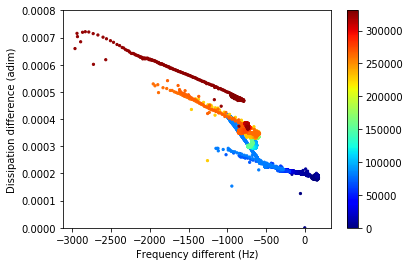

In [69]:
fig, ax1 = plt.subplots(figsize=(6,4))
sc= ax1.scatter(x,y,c=z, cmap='jet', s=5)
ax1.set_xlabel('Frequency different (Hz)')
ax1.set_ylabel('Dissipation difference (adim)')
#ax1.set_xlim(-1500, 100)
ax1.set_ylim(0, 0.0008)
plt.colorbar(sc)
plt.savefig('plot4.png', dpi=1200)
plt.show()

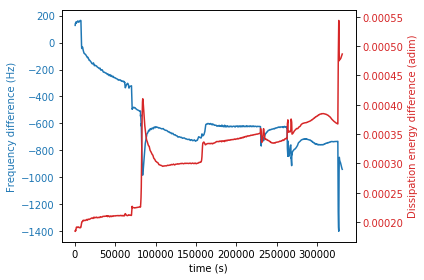

In [17]:
##rolling mean data processing on the delta data
fig, ax1 = plt.subplots()
color='tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Frequency difference (Hz)', color=color)
ax1.plot(df['elapsedsec'], df['deltaFrolling'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'

ax2.set_ylabel('Dissipation energy difference (adim)', color=color)
ax2.plot(df['elapsedsec'], df['deltaDrolling'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig('plot5.png', dpi=1200)
plt.show()



In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

x=df['elapsedsec']
y=df['deltaFrolling']
z=x
ax1.scatter(x, y, c=z, cmap='jet', s=5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency difference (Hz)')
y=df['deltaDrolling']
ax2.scatter(x,y,c=z, cmap='jet', s=5)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Dissipation difference (adim)')
ax2.set_ylim(0, 0.0008)
x=df['deltaFrolling']
y=df['deltaDrolling']
sc= ax3.scatter(x,y,c=z, cmap='jet', s=5)
ax3.set_xlabel('Frequency difference (Hz)')
ax3.set_ylabel('Dissipation difference (adim)')
#ax3.set_xlim(-1500, 100)
ax3.set_ylim(0, 0.0008)
fig.tight_layout(pad=1, w_pad=1)
plt.colorbar(sc, use_gridspec=True)
plt.xticks(x, rotation=45)
plt.savefig('plot6.png', dpi=1200, bbox_inches='tight')
plt.show()

C:\Users\Davince\Anaconda3\lib\site-packages\matplotlib\ticker.py:676: RuntimeWarning: invalid value encountered in less_equal
  locs = locs[(vmin <= locs) & (locs <= vmax)]


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 16800x4800 with 4 Axes>

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,4))

x=df['elapsedsec']
y=df['deltaF']
z=x

ax1.scatter(x, y, c=z, cmap='jet', s=5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency difference (Hz)')
y=df['deltaD']
ax2.scatter(x,y,c=z, cmap='jet', s=5)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Dissipation difference (adim)')
ax2.set_ylim(0, 0.0008)
x=df['deltaF']
y=df['deltaD']
sc= ax3.scatter(x,y,c=z, cmap='jet', s=5)
ax3.set_xlabel('Frequency difference (Hz)')
ax3.set_ylabel('Dissipation difference (adim)')
#ax3.set_xlim(-1500, 100)
ax3.set_ylim(0, 0.0008)
fig.tight_layout(pad=1, w_pad=1)
plt.colorbar(sc, use_gridspec=True)
plt.xticks(x, rotation=45)

anim=animation.FuncAnimation(fig, animate )